<a href="https://colab.research.google.com/github/KwameCode27/youtube-gaming-ml-analysis/blob/main/top_youtube_streamers_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install matplotlib

     ---------------------------------------- 0.0/111.9 kB ? eta -:--:--
     ------------------------------------ --- 102.4/111.9 kB ? eta -:--:--
     ------------------------------------ --- 102.4/111.9 kB ? eta -:--:--
     ------------------------------------ 111.9/111.9 kB 924.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.1 MB 9.6 MB/s eta 0:00:01
   ---- ----------------------------------- 0.9/8.1 MB 8.5 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/8.1 MB 10.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/8.1 MB 10.1 MB/s eta 0:00:01
   ------------ --------------------------- 2.6/8.1 MB 9.7 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 9.4 MB/s eta 0:00:01
   ---------------- ----------------------- 3.4/8.1 MB 9.3 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 9.2 MB/s eta 0:00:01
   ---------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# ============================
# YouTube Gaming Channel Analysis & ML
# ============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Matplotlib is building the font cache; this may take a moment.


In [5]:
# ----------------------------
# 1. Load Data
# ----------------------------
file_path = "C:\\Users\\fente\\Desktop\\youtube-gaming-ml-analysis\\data\\Top YouTube Gaming Channels - 03 Aug - 02 Sep, 2025.csv"
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head(10)

Dataset Shape: (60, 6)
Columns: ['Channel', 'Platform', 'Hours Watched', 'Peak Viewers', 'Average Viewers', 'Airtime Hours']


,Channel,Platform,Hours Watched,Peak Viewers,Average Viewers,Airtime Hours
0,Typical Gamer,ytg,1.268067e+07,296335,42290.63,506.400000
1,LCK,ytg,8.255610e+06,392120,69046.08,239.133333
2,Megadragom GamePlay,ytg,6.647635e+06,224186,50477.36,221.450000
3,KreekCraft,ytg,5.891872e+06,316641,49375.37,239.600000
4,BLAST Premier,ytg,5.387872e+06,176947,32643.88,330.100000
5,Dream,ytg,5.386156e+06,180931,43448.55,209.983333
6,AlsoTom,ytg,4.418084e+06,28418,6292.64,2252.966667
7,NODWIN Gaming,ytg,4.319085e+06,215156,26658.28,324.033333
8,IShowSpeed,ytg,4.228691e+06,212155,31223.26,173.300000
9,MPL Indonesia,ytg,4.213922e+06,378618,34111.62,247.066667


In [6]:
# ----------------------------
# 2. Feature Engineering
# ----------------------------
df["Viewers_per_Hour"] = df["Average Viewers"] * df["Airtime Hours"]
df["Efficiency"] = df["Hours Watched"] / df["Airtime Hours"]


In [7]:
# 3. Regression Modeling
# ----------------------------
X = df[["Peak Viewers", "Average Viewers", "Airtime Hours", "Viewers_per_Hour", "Efficiency"]]
y = df["Hours Watched"]


In [8]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models
lin_reg = LinearRegression()
rf_reg = RandomForestRegressor(random_state=42, n_estimators=200)


In [10]:
# Train
lin_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test)
y_pred_rf = rf_reg.predict(X_test)


In [12]:
# Evaluation
def evaluate_model(y_true, y_pred, name):
    return {
        "Model": name,
        "R2": r2_score(y_true, y_pred),
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred))
    }

results = [
    evaluate_model(y_test, y_pred_lin, "Linear Regression"),
    evaluate_model(y_test, y_pred_rf, "Random Forest")
]

results_df = pd.DataFrame(results)
print("\nModel Performance:\n", results_df)



Model Performance:
                Model        R2            MAE          RMSE
0  Linear Regression  0.772635  729528.253440  1.493584e+06
1      Random Forest  0.609981  871490.021979  1.956190e+06


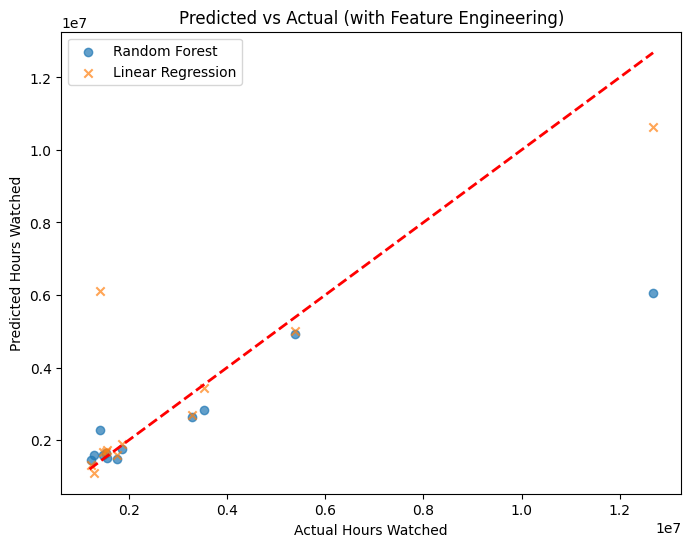

In [13]:
# ----------------------------
# 4. Visualization - Predicted vs Actual
# ----------------------------
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, label="Random Forest")
plt.scatter(y_test, y_pred_lin, alpha=0.7, label="Linear Regression", marker="x")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", lw=2)
plt.xlabel("Actual Hours Watched")
plt.ylabel("Predicted Hours Watched")
plt.title("Predicted vs Actual (with Feature Engineering)")
plt.legend()
plt.show()

# Model Improvement

In [14]:
# ----------------------------
# 5. Clustering Channels
# ----------------------------
cluster_features = df[["Average Viewers", "Airtime Hours", "Viewers_per_Hour", "Efficiency"]]

# Scale features
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_features)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(cluster_scaled)


In [15]:
# Cluster summary
cluster_summary = df.groupby("Cluster")[["Average Viewers", "Airtime Hours", "Viewers_per_Hour", "Efficiency"]].mean()
print("\nCluster Summary:\n", cluster_summary)


Cluster Summary:
          Average Viewers  Airtime Hours  Viewers_per_Hour    Efficiency
Cluster                                                                
0           12882.748780     336.415854      3.628306e+06   7071.193069
1           40904.602941     220.385294      8.707974e+06  23682.563864
2            5516.385000    1915.775000      1.082990e+07   2021.063754


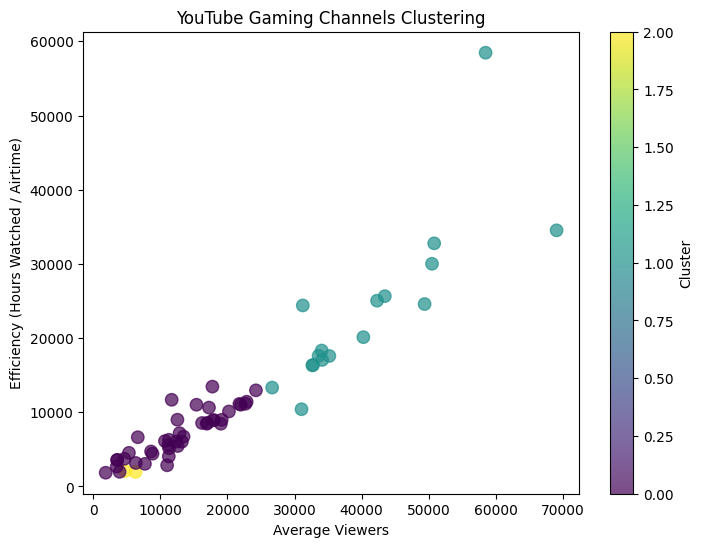

In [16]:
# Visualization - Clusters
plt.figure(figsize=(8,6))
plt.scatter(df["Average Viewers"], df["Efficiency"], c=df["Cluster"], cmap="viridis", s=80, alpha=0.7)
plt.xlabel("Average Viewers")
plt.ylabel("Efficiency (Hours Watched / Airtime)")
plt.title("YouTube Gaming Channels Clustering")
plt.colorbar(label="Cluster")
plt.show()

In [18]:
import joblib

# ----------------------------
# 6. Save Best Model
# ----------------------------
# Let's say Linear Regression performed best
joblib.dump(lin_reg, "models/linear_model.pkl")
print("✅ Linear Regression model saved as models/linear_model.pkl")

# If you also want to save the Random Forest:
joblib.dump(rf_reg, "models/random_forest_model.pkl")
print("✅ Random Forest model saved as models/random_forest_model.pkl")

✅ Linear Regression model saved as models/linear_model.pkl
✅ Random Forest model saved as models/random_forest_model.pkl
